# 6. Logistic regression

Logistic regression is a widely used statistical classification method that models the relationship between one or more independent variables and a binary outcome variable. It estimates the probability that an instance belongs to a particular class, making it an essential tool in binary and multi-class classification problems.

**Note**:
* Despite its name, logistic regression is used for classification tasks rather than regression.
* Linear Regression is used to predict continuous outcomes.
* Logistic Regression is used to predict the likelihood of an observation falling into a specific category. 

## Overview
1. Terminology
2. How it works
3. Types of logistic regression
4. Assumptions
5. Common pitfalls
6. Evaluation metrics
7. Differences between Linear and Logistic Regression
8. Practical examples
    * 8.1. Binomial Logistic Regression
    * 8.2. Multinomial LR
    * 8.3. Ordinal LR

## 1. Terminology
* **Independent variables:** The input characteristics or predictor factors applied to the dependent variable’s predictions.
* **Dependent variable:** The output variable that we are trying to predict.
* **Odds:** It is the ratio of something occurring to something not occurring. it is different from probability as the probability is the ratio of something occurring to everything that could possibly occur.
* **Log-odds:** also known as the logit function, is the natural logarithm of the odds. In logistic regression, the log odds of the dependent variable are modeled as a linear combination of the independent variables and the intercept.
* **Coefficient**: The logistic regression model’s estimated parameters, show how the independent and dependent variables relate to one another.
* **Intercept**: A constant term in the logistic regression model, which represents the log odds when all independent variables are equal to zero.
* **Maximum likelihood estimation:** The method used to estimate the coefficients of the logistic regression model, which maximizes the likelihood of observing the data given the model.

## 2. How it works
Logistic regression transforms the linear combination of independent variables into a probability
using the logistic function (also known as the sigmoid function):

$$ y = \frac{1}{1 + e^{-z}} $$

where:
* $z = a + b_1x_1 + b_2x_2 + ... + b_nx_n$ --> linear regression equation
* $y$ is the probability of the event occurring

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190522162153/sigmoid-function-300x138.png" width="400">

As shown above, the figure sigmoid function converts the continuous variable data into the probability i.e. between 0 and 1. 
* σ(z)  tends towards 1 as z→∞
* σ(z)  tends towards 0 as z→-∞
* σ(z)  is always bounded between 0 and 1

Where the probability of being a class can be measured as:

$$ P(y=1|x) = \frac{1}{1 + e^{-z}} = σ(z)$$
$$ P(y=0|x) = 1 - P(y=1|x) = 1 - σ(z)$$

An example where you might use logistic regression includes predicting if a customer might churn and leave a company’s service.

## 3. Types of logistic regression

There are three main types of logistic regression:

1. **Binomial logistic regression**: The target variable has only two possible outcomes, such as 0 or 1, Pass or Fail, etc.

2. **Multinomial logistic regression**: The target variable has three or more categories that are not ordered, such as “cat”, “dogs”, or “sheep”.

3. **Ordinal logistic regression**: The target variable has three or more ordered dependent variables or categories, such as “low”, “Medium”, or “High”.

## 4. Assumptions
Logistic regression relies on the following assumptions:

* **Linearity of the logit:** The log odds of the probability of the outcome variable being in a certain class is a linear combination of the independent variables.

* **Independence of errors:** The errors or residuals are assumed to be independent of each other.

* **Non-multicollinearity:** The independent variables should not be highly correlated with each other.

* **Sufficiently large sample size:** Logistic regression works best with a sufficiently large sample size to ensure stable estimates.

## 5. Common pitfalls
When working with logistic regression, it’s important to be aware of potential pitfalls:
* **Imbalanced classes:** Logistic regression may perform poorly when dealing with imbalanced class distributions. Some methods to address imbalanced class distribution include resampling, adjusting the weights of a class (e.g. how important an example is when training a model), and looking at different evaluation metrics like recall.

* **Non-linear relationships**: Logistic regression assumes a linear relationship between the independent variables and the log odds of the outcome. Complex non-linear relationships may not be captured effectively.

* **Overfitting**: Including too many variables or polynomial terms can lead to overfitting, especially with limited data.

* **Multicollinearity**: Highly correlated independent variables can affect the stability and interpretability of coefficient estimates.

## 6. Evaluation metrics
We can evaluate the logistic regression model using the following metrics:

* **Accuracy**: The proportion of correctly classified instances.
$$ Accuracy = \frac{TP + TN}{Total} $$

* **Precision**: The proportion of correctly predicted positive observations out of all predicted positives.
$$ Precision = \frac{TP}{TP + FP} $$

* **Recall (Sensitivity)**: The proportion of correctly predicted positive observations out of all actual positives.
$$ Recall = \frac{TP}{TP + FN} $$

* **F1 Score**: The harmonic mean of precision and recall.
$$ F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall} $$

* **Area Under the Receiver Operating Characteristic Curve (AUC-ROC):** The ROC curve plots the true positive rate against the false positive rate at various thresholds. AUC-ROC measures the area under this curve, providing an aggregate measure of a model’s performance across different classification thresholds. An AUC-ROC of 0.5 indicates a random classifier, while an AUC-ROC of 1 indicates a perfect classifier.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Roc_curve.svg/1024px-Roc_curve.svg.png" width="300">

* **Area Under the Precision-Recall Curve (AUC-PR):** Similar to AUC-ROC, AUC-PR measures the area under the precision-recall curve, providing a summary of a model’s performance across different precision-recall trade-offs. An AUC-PR of 0 indicates a model with no predictive power, while an AUC-PR of 1 indicates a perfect classifier.

<img src="https://miro.medium.com/v2/resize:fit:1400/1*fZbLztyetGApfvwN3n7LDA.png" width="600">

It is also very useful to look at the **confusion matrix** to understand the model's performance in more detail.

<img src="https://images.prismic.io/encord/edfa849b-03fb-43d2-aba5-1f53a8884e6f_image5.png?auto=compress,format" width="600">

## 7. Differences between Linear and Logistic Regression

| Linear Regression | Logistic Regression |
|-------------------|---------------------|
| Used for predicting continuous outcomes | Used for predicting the likelihood of an observation falling into a specific category |
| Used for solving regression problem | Used for solving classification problems |
| The output is continuous | The output is a probability between 0 and 1 for each category|
| In this we find best fit line | In this we find the best fit S-curve |
| Least square estimation method is used for estimation of accuracy. | Maximum likelihood estimation method is used for Estimation of accuracy. |
| It required linear relationship between dependent and independent variables. | It not required linear relationship. |






## 8. Implementation Example

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             classification_report,
                             roc_curve,
                             roc_auc_score,
                             precision_recall_curve,
                             )

from sklearn.datasets import load_breast_cancer, load_digits

### 8.1. Binomial Logistic Regression

In [2]:
# Load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# Split the train and test dataset
X_train, X_test,\
    y_train, y_test = train_test_split(X, y,
                                       test_size=0.20,
                                       random_state=23)
# Build and fit the model
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95        39
           1       0.96      0.99      0.97        75

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



c:\Users\tesal\miniconda3\envs\ds-training\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Precision-Recall Curve')

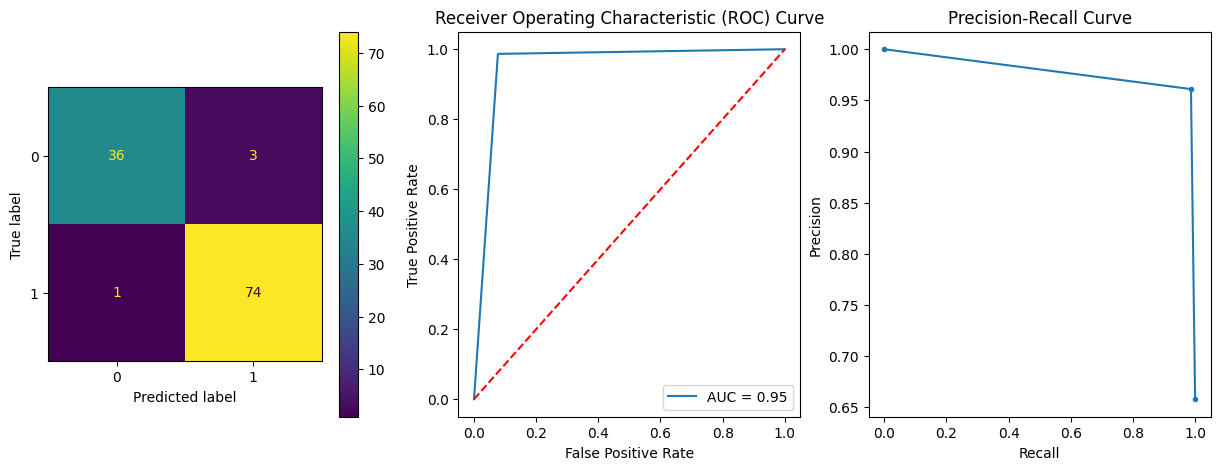

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax[0])

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
ax[1].plot(fpr, tpr, label='AUC = {:.2f}'.format(auc))
ax[1].plot([0, 1], [0, 1], 'r--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC) Curve')
ax[1].legend()

# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
ax[2].plot(recall, precision, marker='.', label='Precision-Recall curve')
ax[2].set_xlabel('Recall')
ax[2].set_ylabel('Precision')
ax[2].set_title('Precision-Recall Curve')

### 8.2. Multinomial Logistic Regression
Target variable can have 3 or more possible types which are not ordered.

In this case, the softmax function is used in place of the sigmoid function.

$$ softmax(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{k} e^{x_j}} $$

where:
* K represents the number of elements in the vector x, and i, j iterates over all the elements in the vector.

The probability of the class c is given by:

$$ P(Y=c | X=x) = \frac{e^{(b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n)}}{\sum_{j=1}^{k} e^{(b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n)}} $$

In Multinomial Logistic Regression, the output variable can have more than two possible discrete outputs. 

We will no use the digit dataset to demonstrate the multinomial logistic regression. The dataset contains 8x8 pixel images of digits from 0 to 9. We will use the logistic regression model to predict the digit in the image.

(1797, 64)


<Figure size 400x200 with 0 Axes>

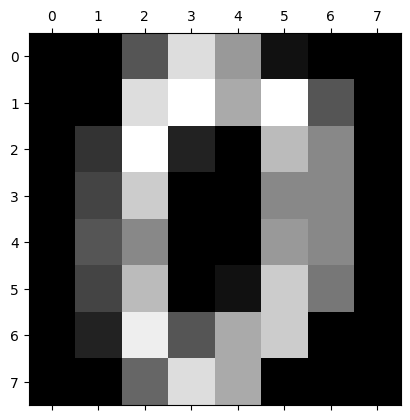

In [5]:
# Load the digit dataset
digits = load_digits()
X = digits.data
y = digits.target
print(X.shape)

plt.figure(figsize=(4, 2))
plt.gray()
#image = X[0].reshape(8, 8)
image = digits.images[0]
plt.matshow(image)
plt.show()

In [6]:
# Splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4,
                                                    random_state=1)

# Create logistic regression object
reg = LogisticRegression()
# train the model using the training sets
reg.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = reg.predict(X_test)

# Comparing actual response values (y_test) with predicted response values (y_pred)
print("Logistic Regression model accuracy(in %):", accuracy_score(y_test, y_pred)*100)

Logistic Regression model accuracy(in %): 96.52294853963839


c:\Users\tesal\miniconda3\envs\ds-training\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 8.3. Ordinal Logistic Regression
Target variable can have 3 or more possible types which are ordered.

In [7]:
# Sample data
data = {'Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # study hours
        'Homework_grade': [5, 5, 5, 8, 6, 7, 8, 9, 10, 10],  # homework grade
        'Marks': ['F', 'F', 'F', 'C', 'C', 'C', 'B', 'B', 'A', 'A']}
df = pd.DataFrame(data)

X = df[['Hours', 'Homework_grade']]
y = df['Marks']
y = y.replace({'F': 0, 'C': 1, 'B': 2, 'A': 3})  # encode the categorical variable
# We dont divide the data into train and test set to go faster, but in real life we should do that

# Create an ordinal logistic regression model
mod_log = OrderedModel(y, X, distr='logit')

res_log = mod_log.fit(method='bfgs', disp=False)
res_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                  Marks   Log-Likelihood:            -1.0684e-06
Model:                   OrderedModel   AIC:                             10.00
Method:            Maximum Likelihood   BIC:                             11.51
Date:                Wed, 22 Jan 2025                                         
Time:                        16:29:20                                         
No. Observations:                  10                                         
Df Residuals:                       5                                         
Df Model:                           2                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Hours             52.9443    2.3e+04      0.002      0.998   -4.51e+04    4.52e+04
Homework_grade    -5.4746   2.83e+04     -0.000      1.000   -5.55e+04    5.55e+04
0/1              145.8363   7.46e+04      0.002      0.998   -1.46e+05    1.46e+05
1/2                5.1111    105.425      0.048      0.961    -201.519     211.741
2/3                4.5516    148.450      0.031      0.976    -286.405     295.508
==================================================================================
"""

            Predicted 1  Predicted 2  Predicted 3  Predicted 4
Observed 1            3            0            0            0
Observed 2            0            3            0            0
Observed 3            0            0            2            0
Observed 4            0            0            0            2


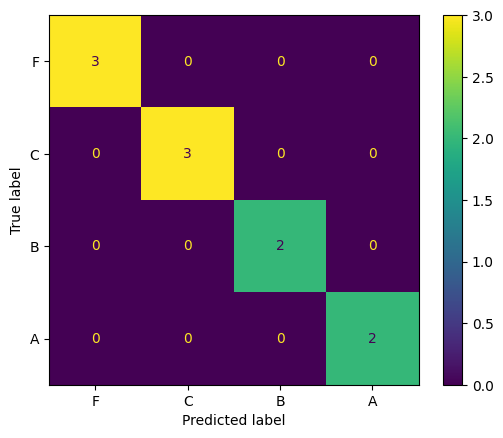

In [8]:
predicted= res_log.model.predict(res_log.params, exog=X).argmax(axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y, predicted, labels=[0, 1, 2, 3])

# Create a DataFrame for better visualization of the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=[f"Observed {i}" for i in range(1, 5)], 
                              columns=[f"Predicted {i}" for i in range(1, 5)])

print(conf_matrix_df)

# Plot the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['F', 'C', 'B', 'A']).plot()